# Mini-projet Image : Tomographie

5GMM N - Nicolas Dublé, Valentin Fouqueau, Elizabeth Fu, Simon Treillou

ressources : 

https://scikit-image.org/docs/stable/api/skimage.transform.html?highlight=rotation

https://scikit-image.org/docs/0.7.0/api/skimage.transform.radon_transform.html

https://scikit-image.org/docs/dev/auto_examples/transform/plot_radon_transform.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#import param
#import panel as pn

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale, rotate
from scipy import fftpack as ft

### Image test : fantôme de Shepp-Logan

Représentative d'une IRM d'une section abdominale.

(160, 160)


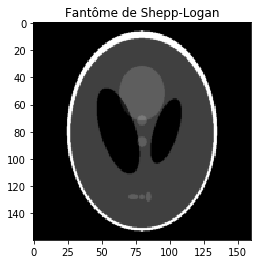

In [2]:
img = shepp_logan_phantom()
img = rescale(img, scale=0.4, mode='reflect', multichannel=False)
print(np.shape(img))

plt.imshow(img, cmap=plt.cm.Greys_r)
plt.title('Fantôme de Shepp-Logan')
plt.show()

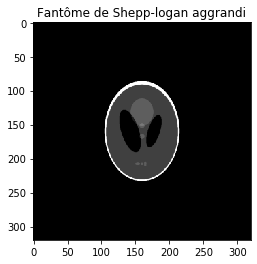

In [3]:
def zero_padding(image):
    M,N = image.shape
    res = np.zeros((M*2,N*2))
    res[int(M/2):int(M*3/2),int(N/2):int(N*3/2)] = np.copy(image)
    return res

imgz = zero_padding(img)
plt.imshow(imgz, cmap=plt.cm.Greys_r)
plt.title('Fantôme de Shepp-logan aggrandi')
plt.show()

### Mission 1 : obtenir le sinogramme

In [36]:
def radon_transform(img, theta_list):
    R = np.zeros((np.shape(img)[0] , len(theta_list)))
    # rotation de l'image pour chaque angle
    for ind in range(len(theta_list)):
        img_rot = rotate(img, -theta_list[ind])
        R[:,ind] = sum(img_rot)
    return R

# skimage.transform.rotate() :
# interpolation spline
# paramètre optionnel : 'order' pour ordre des splines (entre 0 et 5)

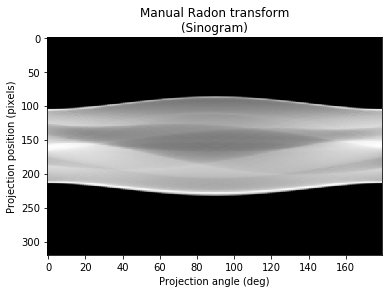

In [37]:
# test
theta_list = np.arange(180)
our_sinogram = radon_transform(imgz, theta_list)

plt.imshow(our_sinogram, cmap=plt.cm.Greys_r, aspect='auto')
plt.title("Manual Radon transform\n(Sinogram)")
plt.xlabel("Projection angle (deg)")
plt.ylabel("Projection position (pixels)")
plt.show()

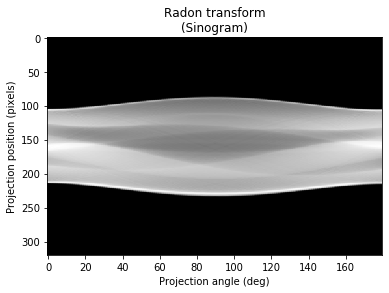

In [6]:
### vérification avec le sinogramme obtenu par radon()
sinogram_radon = radon(imgz, theta=theta_list, circle=True)

plt.imshow(sinogram_radon, cmap=plt.cm.Greys_r, aspect='auto')
plt.title("Radon transform\n(Sinogram)")
plt.xlabel("Projection angle (deg)")
plt.ylabel("Projection position (pixels)")
plt.show()

### Mission 2 : reconstruire l'image à partir du sinogramme

#### • Méthode 1 : rétroprojection filtrée

#### • Méthode 2 : itératives par projection (ART)

#### • Méthode 3 : formulation variationnelle

Les 3 méthodes n'ont pas les même défauts. L'efficacité des méthodes 1 et 2 dépendant du nombre de direction (angles).

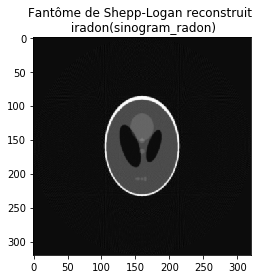

In [11]:
### CE QU'ON SOUHAITE AVOIR :
### avec iradon()
iradon_sinogram_radon = iradon(sinogram_radon)

plt.imshow(iradon_sinogram_radon, cmap=plt.cm.Greys_r)
plt.title('Fantôme de Shepp-Logan reconstruit \n iradon(sinogram_radon)')
plt.show()

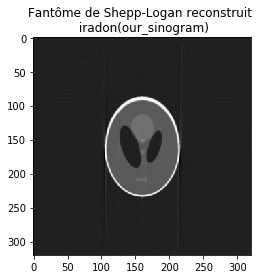

In [12]:
iradon_our_sinogram = iradon(our_sinogram)

plt.imshow(iradon_our_sinogram, cmap=plt.cm.Greys_r)
plt.title('Fantôme de Shepp-Logan reconstruit \n iradon(our_sinogram)')
plt.show()

In [54]:
def retroprojection_non_filtree(sinogram, theta_list):
    L,A = np.shape(sinogram) #320,160
    temp = np.zeros((L,L,A)) #320,320,160
    img_rec = np.zeros((L,L)) #320,320
    for index_angle in range(A):
        #print("angle numéro :", index_angle)
        tempp = np.zeros((L, L))
        # sélection de la colonne
        col = sinogram[:,index_angle]
        for index_line in range(len(col)):
            #print("valeur à copier :", col[index_line])
            tempp[index_line,:] = np.repeat(col[index_line],L)
            #print(tempp[index_line,:])
        temp[:,:,index_angle] = rotate(tempp, theta_list[index_angle])
        #plt.imshow(temp[:,:,index_angle], cmap=plt.cm.Greys_r)
        #plt.title('Fantôme de Shepp-Logan reconstruit \n rétroprojection non filtrée')
        #plt.show()
        img_rec += temp[:,:,index_angle]
    
    #return img_rec
    return rotate(img_rec, 90)

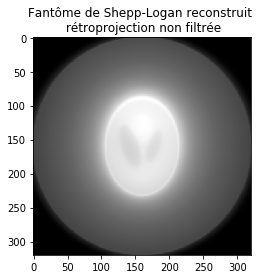

In [55]:
### test
our_img_rec = retroprojection_non_filtree(our_sinogram, theta_list)

plt.imshow(our_img_rec, cmap=plt.cm.Greys_r)
plt.title('Fantôme de Shepp-Logan reconstruit \n rétroprojection non filtrée')
plt.show()

### Test variation d'ordre d'interpolation 

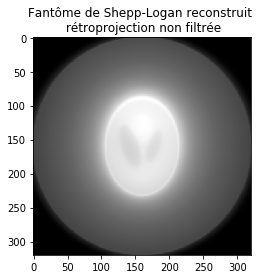

In [75]:
## ordre 1
def retroprojection_non_filtree(sinogram, theta_list):
    L,A = np.shape(sinogram) #320,160
    temp = np.zeros((L,L,A)) #320,320,160
    img_rec = np.zeros((L,L)) #320,320
    for index_angle in range(A):
        #print("angle numéro :", index_angle)
        tempp = np.zeros((L, L))
        # sélection de la colonne
        col = sinogram[:,index_angle]
        for index_line in range(len(col)):
            #print("valeur à copier :", col[index_line])
            tempp[index_line,:] = np.repeat(col[index_line],L)
            #print(tempp[index_line,:])
        temp[:,:,index_angle] = rotate(tempp, theta_list[index_angle], order = 1)
        #plt.imshow(temp[:,:,index_angle], cmap=plt.cm.Greys_r)
        #plt.title('Fantôme de Shepp-Logan reconstruit \n rétroprojection non filtrée')
        #plt.show()
        img_rec += temp[:,:,index_angle]
    
    #return img_rec
    return rotate(img_rec, 90)

### test
our_img_rec_order1 = retroprojection_non_filtree(our_sinogram, theta_list)

plt.imshow(our_img_rec_order1, cmap=plt.cm.Greys_r)
plt.title('Fantôme de Shepp-Logan reconstruit \n rétroprojection non filtrée \n ordre 1')
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:387: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  mode=mode, cval=cval, clip=clip, preserve_range=preserve_range)


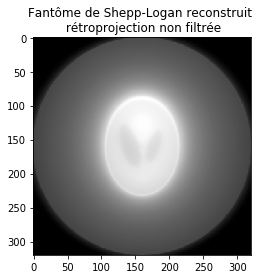

In [76]:
## ordre 2
def retroprojection_non_filtree(sinogram, theta_list):
    L,A = np.shape(sinogram) #320,160
    temp = np.zeros((L,L,A)) #320,320,160
    img_rec = np.zeros((L,L)) #320,320
    for index_angle in range(A):
        #print("angle numéro :", index_angle)
        tempp = np.zeros((L, L))
        # sélection de la colonne
        col = sinogram[:,index_angle]
        for index_line in range(len(col)):
            #print("valeur à copier :", col[index_line])
            tempp[index_line,:] = np.repeat(col[index_line],L)
            #print(tempp[index_line,:])
        temp[:,:,index_angle] = rotate(tempp, theta_list[index_angle], order = 2)
        #plt.imshow(temp[:,:,index_angle], cmap=plt.cm.Greys_r)
        #plt.title('Fantôme de Shepp-Logan reconstruit \n rétroprojection non filtrée')
        #plt.show()
        img_rec += temp[:,:,index_angle]
    
    #return img_rec
    return rotate(img_rec, 90)

### test
our_img_rec_order2 = retroprojection_non_filtree(our_sinogram, theta_list)

plt.imshow(our_img_rec_order2, cmap=plt.cm.Greys_r)
plt.title('Fantôme de Shepp-Logan reconstruit \n rétroprojection non filtrée \n ordre 2')
plt.show()

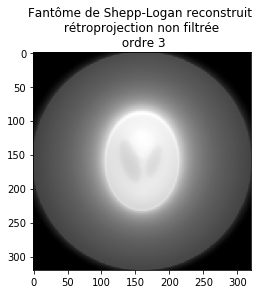

In [78]:
## ordre 3
def retroprojection_non_filtree(sinogram, theta_list):
    L,A = np.shape(sinogram) #320,160
    temp = np.zeros((L,L,A)) #320,320,160
    img_rec = np.zeros((L,L)) #320,320
    for index_angle in range(A):
        #print("angle numéro :", index_angle)
        tempp = np.zeros((L, L))
        # sélection de la colonne
        col = sinogram[:,index_angle]
        for index_line in range(len(col)):
            #print("valeur à copier :", col[index_line])
            tempp[index_line,:] = np.repeat(col[index_line],L)
            #print(tempp[index_line,:])
        temp[:,:,index_angle] = rotate(tempp, theta_list[index_angle], order = 3)
        #plt.imshow(temp[:,:,index_angle], cmap=plt.cm.Greys_r)
        #plt.title('Fantôme de Shepp-Logan reconstruit \n rétroprojection non filtrée')
        #plt.show()
        img_rec += temp[:,:,index_angle]
    
    #return img_rec
    return rotate(img_rec, 90)

### test
our_img_rec_order3 = retroprojection_non_filtree(our_sinogram, theta_list)

plt.imshow(our_img_rec_order3, cmap=plt.cm.Greys_r)
plt.title('Fantôme de Shepp-Logan reconstruit \n rétroprojection non filtrée \n ordre 3')
plt.show()

### Rétroprojection filtrée

On définit une opération de filtrage. Cette opération va filtrer chaque projection du sinogramme pour enlever les hautes fréquences. Pour cela, on passe par la transformée de Fourier 1D sur chaque projection (donc 1D) et on multiplie par le filtre pour avoir notre convolution. On effectue ensuite une transformée de Fourier inverse et on n'a plus qu'à rétro-projeter comme précédemment.

On propose ici deux filtres : un filtre rampe simple et un filtre rampe adouci.

Figures sympas à mettre éventuellement ici : http://www.guillemet.org/irene/coursem/APRAMENrecon.pdf

In [56]:
def filtrage(sinogram,filtre,theta_list):
    T,A = sinogram.shape #Taille image, nb d'angles
    res = sinogram*0.
    for j in range(A): #colonnes = angles
        four = ft.fft(sinogram[:,j])
        res[:,j] = np.real(ft.ifft(four*filtre(T)))
    return res

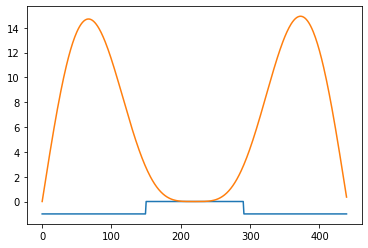

In [57]:
def rampe(T,a=1):
    step = 2*np.pi/T
    w = np.arange(-np.pi,np.pi,step)
    r = -abs(w)
    filt = ft.fftshift(r)
    return (np.abs(w)>1)+0.

plt.plot(-rampe(440))

def rampe_adoucie(T, a=5):
    step = 2*np.pi/T
    w = np.arange(-np.pi, np.pi, step)
    rn1 = abs(w)  # filtre rampe
    rn2 = a*np.hanning(T)  #sinc window with 'a' modifying the cutoff freqs
    r = rn1*(rn2)**2             #modulation of ramp filter with sinc window
    filt = ft.fftshift(r) 
    return filt

plt.plot(rampe_adoucie(440))

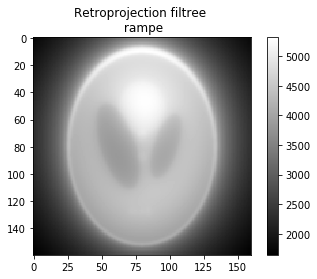

In [71]:
sinoFilt = filtrage(our_sinogram,rampe,theta_list)
imrec_rampe = retroprojection_non_filtree(sinoFilt, theta_list)
L,C = np.shape(img)
crop_imrec_rampe = imrec_rampe[int(L/2):L+int(L/2),int(C/2):C+int(C/2)]

plt.imshow(crop_imrec_rampe,cmap='gray')
plt.title("Retroprojection filtree \n rampe")
plt.colorbar()
plt.show()

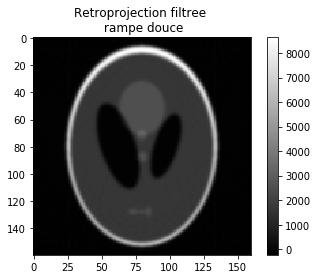

In [72]:
sinoFilt = filtrage(our_sinogram,rampe_adoucie,theta_list)
imrec_rampedouce = retroprojection_non_filtree(sinoFilt, theta_list)
L,C = np.shape(img)
crop_imrec_rampedouce = imrec_rampedouce[int(L/2):L+int(L/2),int(C/2):C+int(C/2)]

plt.imshow(crop_imrec_rampedouce,cmap='gray')
plt.title("Retroprojection filtree \n rampe douce")
plt.colorbar()
plt.show()

In [ ]:
## Méthode 2 : ITÉRATIVES PAR PROJECTION

In [ ]:
## Méthode 3 : FORMULATION VARIATIONNELLE